In [32]:
import pandas as pd
df = pd.read_csv('/Users/apple/Desktop/1030_sem_project/mxmh_survey_results.csv')
df = df.drop('Permissions', axis = 1)
df = df.drop('Timestamp', axis = 1)
#df = df.drop('Primary steaming service', axis = 1)
df = df.drop('Age',axis = 1)
df = df.drop('Hours per day',axis = 1)
df = df.drop('BPM',axis = 1)
df.head()

,Primary streaming service,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,Spotify,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,Rarely,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,Pandora,Yes,No,No,Rock,Yes,No,Sometimes,Never,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,Spotify,No,No,No,Video game music,No,Yes,Never,Never,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,YouTube Music,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,Spotify,Yes,No,No,R&B,Yes,No,Never,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

y = df['Anxiety'] 
X = df.loc[:, df.columns != 'Anxiety']

random_state =42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

(588, 27) (588,)
test set: (148, 27) (148,)
   training set: (470, 27) (470,)
   validation set: (118, 27) (118,)
   training set: (470, 27) (470,)
   validation set: (118, 27) (118,)
   training set: (470, 27) (470,)
   validation set: (118, 27) (118,)
   training set: (471, 27) (471,)
   validation set: (117, 27) (117,)
   training set: (471, 27) (471,)
   validation set: (117, 27) (117,)


In [34]:
#Preprocess the data - what preprocessor I use? (encoder/scaler + fit_transform)
from sklearn.preprocessing import OrdinalEncoder #Ordinal variable
#help(OrdinalEncoder)

# initialize the encoder
Ordinal_ftr = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', \
               'Frequency [Hip hop]','Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', \
               'Frequency [Metal]', 'Frequency [Pop]','Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', \
               'Frequency [Video game music]', 'Depression', 'Insomnia','OCD']

Ordinal_cats = [['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10],[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10],[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]]
onehot_ftrs = ['Primary streaming service','While working', 'Instrumentalist', 'Composer', 'Fav genre', \
                   'Exploratory', 'Foreign languages', 'Music effects']
#std_ftrs = ['Age', 'Hours per day','BPM']

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = Ordinal_cats))])

# standard scaler
#numeric_transformer = Pipeline(steps=[
 #   ('imputer', SimpleImputer(strategy='mean')),
  #  ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=Ordinal_cats), Ordinal_ftr),
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), onehot_ftrs)
        #('std_scaler', StandardScaler(), std_ftrs)
    ])

In [36]:
enc_o = OrdinalEncoder(categories = Ordinal_cats)   # By default, the categories are alphabetically ordered
enc_o.fit(X_train[Ordinal_ftr])
enc_o.transform(X_train[Ordinal_ftr])
enc_o.transform(X_val[Ordinal_ftr])
enc_o.transform(X_test[Ordinal_ftr])

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(X_train[onehot_ftrs])
enc.transform(X_train[onehot_ftrs])
enc.transform(X_val[onehot_ftrs])
enc.transform(X_test[onehot_ftrs])



array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
scaler = StandardScaler()
scaler.fit_transform(X_train[std_ftrs])
scaler.transform(X_val[std_ftrs])
scaler.transform(X_test[std_ftrs])

NameError: name 'std_ftrs' is not defined

In [38]:
from sklearn.impute import SimpleImputer

# Assuming X_train contains your features
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
imputer.fit_transform(X_train[std_ftrs])
imputer.transform(X_val[std_ftrs])
imputer.transform(X_test[std_ftrs])

NameError: name 'std_ftrs' is not defined

In [39]:
df.isnull().sum()

Primary streaming service       1
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   8
dtype: int64

In [40]:
df = df.dropna()
df.isnull().sum()
#df = df.drop('Age',axis = 1)
#df = df.drop('Hours per day',axis = 1)
#df = df.drop('BPM',axis = 1)

Primary streaming service       0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects                   0
dtype: int64

In [41]:
y = df['Anxiety'] 
X = df.loc[:, df.columns != 'Anxiety']

random_state =42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

(575, 27) (575,)
test set: (144, 27) (144,)
   training set: (460, 27) (460,)
   validation set: (115, 27) (115,)
   training set: (460, 27) (460,)
   validation set: (115, 27) (115,)
   training set: (460, 27) (460,)
   validation set: (115, 27) (115,)
   training set: (460, 27) (460,)
   validation set: (115, 27) (115,)
   training set: (460, 27) (460,)
   validation set: (115, 27) (115,)


In [42]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(f'preprocessed train size: {df_train.shape}')

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(f'preprocessed validation size: {df_val.shape}')

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(f'preprocessed test size: {df_test.shape}')

preprocessed train size: (460, 54)
preprocessed validation size: (115, 54)
preprocessed test size: (144, 54)


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# create xgboost model and set parameters 
logreg = LogisticRegression(random_state=random_state,max_iter=1000)

# fit model to train data 
logreg.fit(df_train,y_train)

# predict on validation 
y_val_pred = logreg.predict(df_val)
print('the CV RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# predict on test 
y_test_pred = logreg.predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

the CV RMSE: 3.159870663286023
the test RMSE: 2.7348065135703234
the test R2: -0.15188021301405974


In [44]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

result = permutation_importance(logreg, df_test, y_test, n_repeats=10,random_state=0)
result

{'importances_mean': array([ 1.31944444e-02,  1.80555556e-02,  6.25000000e-03, -7.63888889e-03,
        -6.25000000e-03,  9.72222222e-03,  2.70833333e-02,  1.66666667e-02,
        -1.38888889e-03, -5.55111512e-18,  2.56944444e-02,  2.01388889e-02,
         1.38888889e-03,  1.73611111e-02,  1.66666667e-02,  1.52777778e-02,
         3.40277778e-02,  1.25000000e-02,  4.23611111e-02, -1.38888889e-03,
        -1.31944444e-02, -4.86111111e-03,  6.94444444e-04,  7.63888889e-03,
         4.86111111e-03,  4.86111111e-03,  4.86111111e-03,  2.77777778e-03,
         2.77777778e-03,  5.55555556e-03,  5.55555556e-03,  2.08333333e-03,
        -6.94444444e-04,  1.38888889e-03, -9.02777778e-03,  0.00000000e+00,
         6.94444444e-03, -6.94444444e-04, -6.94444444e-04,  0.00000000e+00,
         0.00000000e+00,  3.47222222e-03, -3.47222222e-03,  2.77777778e-03,
        -6.94444444e-04,  2.77777778e-03, -1.38888889e-03,  1.18055556e-02,
         1.18055556e-02,  9.02777778e-03,  9.02777778e-03,  6.944444

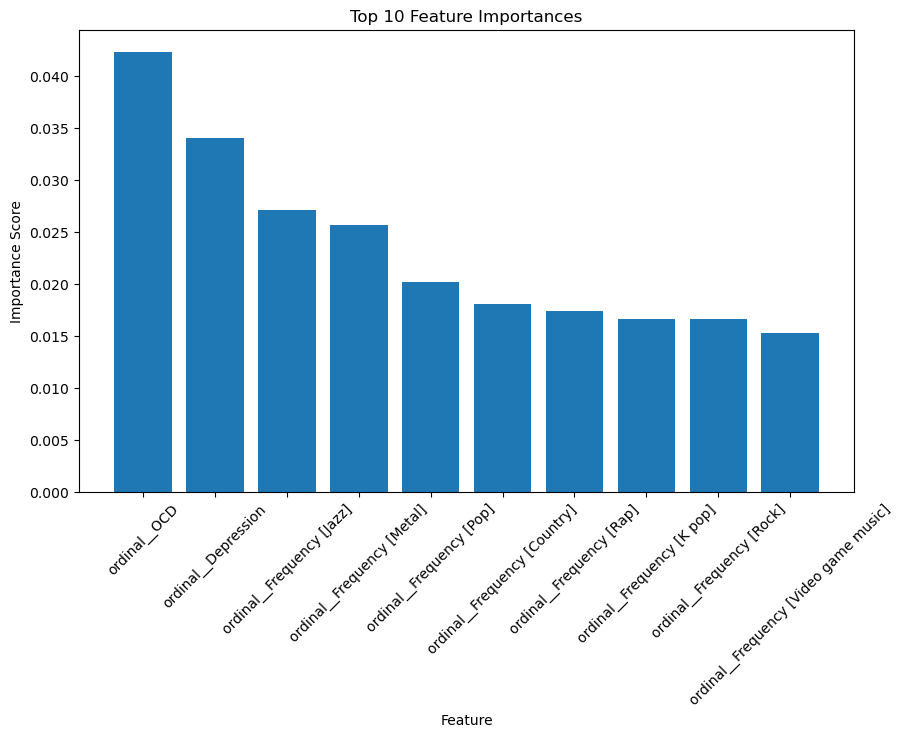

In [45]:
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

#Get top 10
top_features = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_features), importances[indices][:top_features], align="center")
plt.xticks(range(top_features), df_test.columns[indices][:top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=random_state)

# fit model to train data 
rf.fit(df_train,y_train)

# predict on validation 
y_val_pred = rf.predict(df_val)
print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# predict on test 
y_test_pred = rf.predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

the val RMSE: 3.076206020126232
the test RMSE: 2.5954019170662392
the test R2: -0.03744086037477978


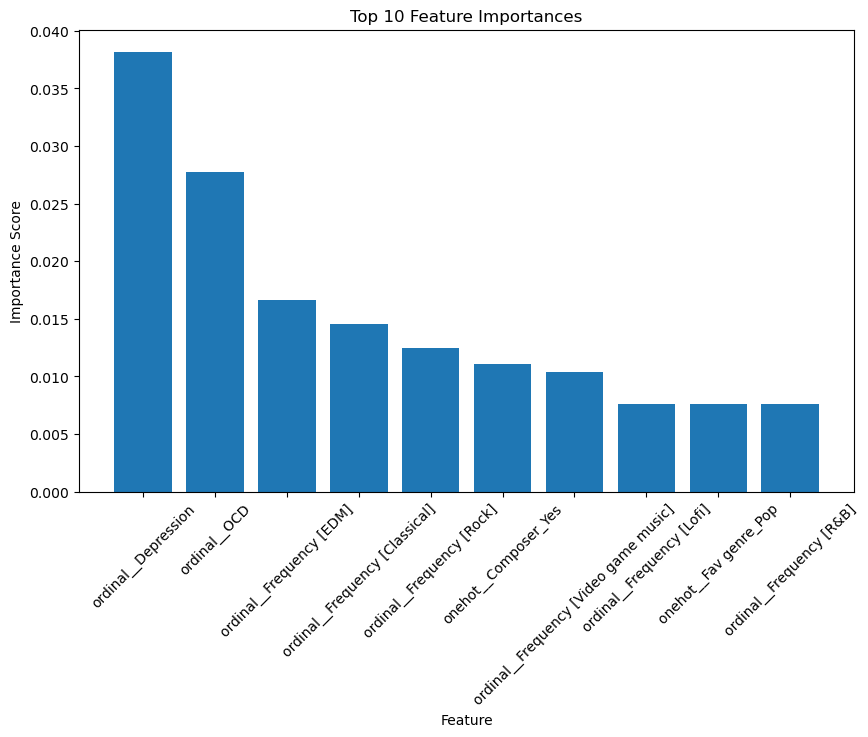

In [47]:
result = permutation_importance(rf, df_test, y_test, n_repeats=10,random_state=0)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

#Get top 10
top_features = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_features), importances[indices][:top_features], align="center")
plt.xticks(range(top_features), df_test.columns[indices][:top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [48]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(random_state=random_state)

# fit model to train data 
svm.fit(df_train,y_train)

# predict on validation 
y_val_pred = svm.predict(df_val)
print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# predict on test 
y_test_pred = svm.predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

the val RMSE: 2.8272739981950044
the test RMSE: 2.3392781412697
the test R2: 0.15721299177801384


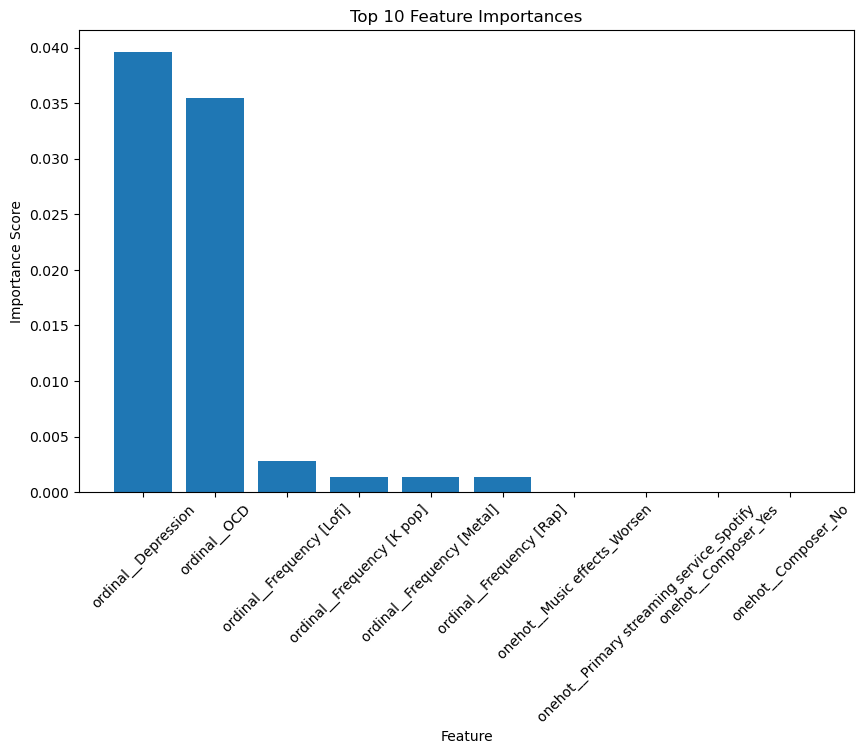

In [49]:
result = permutation_importance(svm, df_test, y_test, n_repeats=10,random_state=0)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

#Get top 10
top_features = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(top_features), importances[indices][:top_features], align="center")
plt.xticks(range(top_features), df_test.columns[indices][:top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

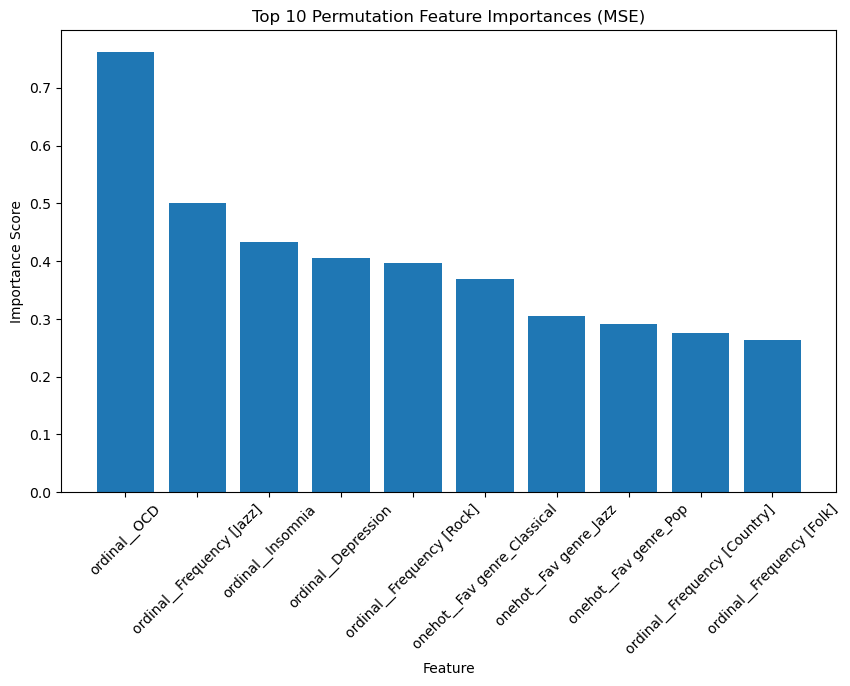

In [58]:
from sklearn.neighbors import KNeighborsRegressor  # Use KNeighborsRegressor for regression
from sklearn.metrics import mean_squared_error

# Assuming df_train and df_val are your feature DataFrames, and y_train and y_val are your target values
# ... (your preprocessing steps)

# Create a StandardScaler
scaler = StandardScaler()

# Scale training data
df_train_scaled = scaler.fit_transform(df_train)

# Create a K-Nearest Neighbors regressor
knn_reg = KNeighborsRegressor()

# Fit model to scaled training data
knn_reg.fit(df_train_scaled, y_train)

# Scale validation data
df_val_scaled = scaler.transform(df_val)

# Predict on validation
y_val_pred = knn_reg.predict(df_val_scaled)

# Evaluate the model on validation data using MSE
mse_baseline = mean_squared_error(y_val, y_val_pred)

# Perform permutation importance using MSE
result = permutation_importance(knn_reg, df_val_scaled, y_val, scoring='neg_mean_squared_error', n_repeats=10, random_state=0)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Plot the top 10 feature importances
top_features = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Permutation Feature Importances (MSE)")
plt.bar(range(top_features), importances[indices][:top_features], align="center")
plt.xticks(range(top_features), df_val.columns[indices][:top_features], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()
